In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
def RMSE(Y, Y_pred):
    Y, Y_pred = np.array(Y), np.array(Y_pred)
    error = (Y_pred - Y)**2
    return np.mean(error) ** 0.5

def MSE(Y, Y_pred):
    Y, Y_pred = np.array(Y), np.array(Y_pred)
    error = (Y_pred - Y)**2
    return np.mean(error)

def error(Y, Y_pred):
    Y, Y_pred = np.array(Y), np.array(Y_pred)
    return np.mean(Y_pred - Y)


In [84]:
class LinearRegressionCalculus:
    def __init__(self):
        self.beta_0 = None
        self.beta_1 = None

    def fit(self, X, Y):
        X = np.array(X)
        Y = np.array(Y)

        n = len(X)
        sum_x = np.sum(X)
        sum_x2 = np.sum(X ** 2)

        sum_y = np.sum(Y)
        sum_xy = np.sum(X*Y)

        MAT1 = np.array([[n, sum_x],[sum_x, sum_x2]])
        MAT2 = np.array([[sum_y],[sum_xy]])

        inv_MAT1 = np.linalg.inv(MAT1)
        self.beta_0, self.beta_1 = (inv_MAT1 @ MAT2).flatten()
    def predict(self, X):
        X = np.array(X)
        return self.beta_0 + self.beta_1 * X

In [85]:
class PolynomialRegressionCalculus:
    def __init__(self, degree = 2):
        self.degree = degree
        self.coefficients = []
    
    def fit(self, X, Y):
        X, Y = np.array(X), np.array(Y)

        MAT1 = np.zeros((self.degree+1, self.degree+1))
        for j in range(self.degree+1):
            for i in range(self.degree+1):
                MAT1[j][i] = np.sum(X ** (i+j))

        MAT2 = np.zeros((self.degree+1, 1))
        for i in range(self.degree+1):
            MAT2[i][0] = np.sum(Y * (X**i))

        inv_MAT1 = np.linalg.inv(MAT1)
        self.coefficients = (inv_MAT1 @ MAT2).flatten()
    
    def predict(self, X):
        X = np.array(X)
        X_poly = np.vstack([X ** i for i in range(self.degree + 1)]).T
        return X_poly @ self.coefficients

        

In [86]:
df = pd.read_csv('datasets/sampledata1.csv')

In [87]:
X = df['Temp']
Y = df['Yield']

In [88]:
model1 = PolynomialRegressionCalculus()
model1.fit(X, Y)
Y_pred = model1.predict(X)
print(f"Coefficients of Polynomial Regression are {','.join(map(str, model1.coefficients))}")
print(f"Polynomial Regression:")
print("    Error:", error(Y, Y_pred))
print("    MSE:", MSE(Y, Y_pred))
print("    RMSE:", RMSE(Y, Y_pred))

Coefficients of Polynomial Regression are 7.960481099653839,-0.15371134020613803,0.0010756013745701848
Polynomial Regression:
    Error: -4.815407332140845e-13
    MSE: 0.04778465063001152
    RMSE: 0.2185970050801509


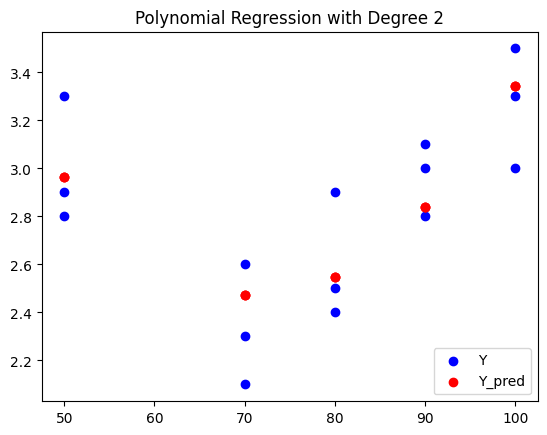

In [89]:
plt.scatter(X, Y, c='blue', label='Y')
plt.scatter(X, Y_pred, c='red', label='Y_pred')
plt.legend(loc='lower right')
plt.title('Polynomial Regression with Degree 2')

plt.show()

In [90]:
model = LinearRegressionCalculus()
model.fit(X, Y)
Y_pred = model.predict(X)
print(f"Coefficients of Linear Regression are {','.join([str(model.beta_0), str(model.beta_1)])}")
print(f"Linear Regression:")
print("    Error:", error(Y, Y_pred))
print("    MSE:", MSE(Y, Y_pred))
print("    RMSE:", RMSE(Y, Y_pred))

Coefficients of Linear Regression are 2.3063063063062974,0.006756756756756936
Linear Regression:
    Error: 5.1810407815840636e-15
    MSE: 0.13270870870870877
    RMSE: 0.36429206511905904


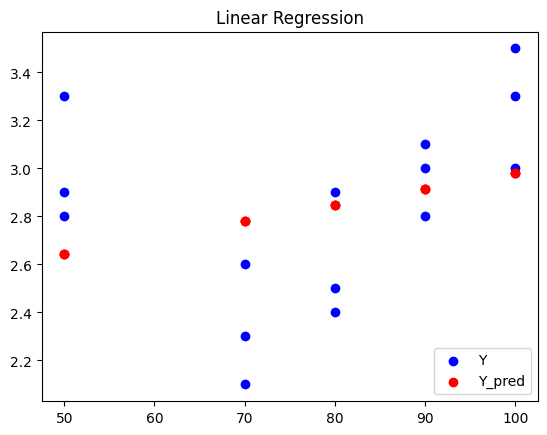

In [91]:
plt.scatter(X, Y, c='blue', label='Y')
plt.scatter(X, Y_pred, c='red', label='Y_pred')
plt.legend(loc='lower right')
plt.title('Linear Regression')

plt.show()